In [1]:
import yaml
import omnialigner as om
%load_ext autoreload
%autoreload 2

plt = om.pl.plt

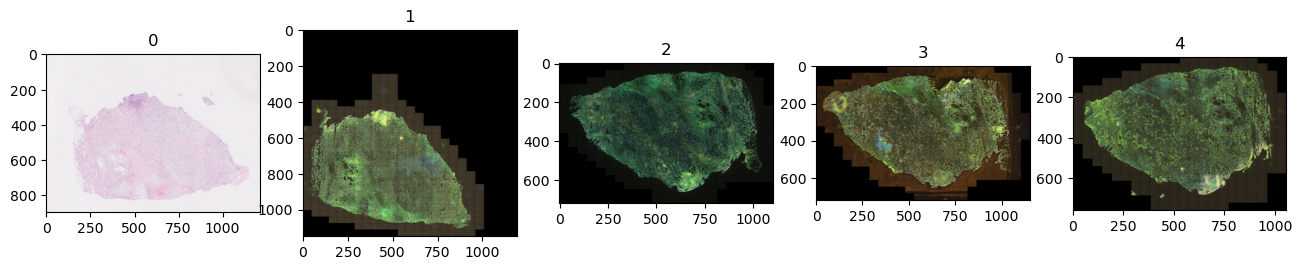

In [2]:
om_config = "../config/panlab2d/config_pdac.yaml"  # Path to your YAML configuration file
group_id = "ALL-TLS_100"  # Replace with your actual group ID
with open(om_config, 'r') as f:
    template_string = f.read()
    config_info = yaml.load(template_string, Loader=yaml.FullLoader)
    config_info["datasets"]["group"] = f"{group_id}"
    config_info["datasets"]["root_dir"] = "~/Documents/projects/pdac3d/omni_data/"
    config_info["datasets"]["file_data"] = "/Users/bqhu/Documents/projects/pdac3d/omnialigner/config/panlab2d/data_ALL-TLS.csv"
    config_info["datasets"]["file_IHC_name"] = "/Users/bqhu/Documents/projects/pdac3d/omnialigner/config/panlab2d/IHC_layer_info.json"
om_data = om.Omni3D(config_info=config_info)

fig = plt.figure(figsize=(16, 5))
for i_layer in range(len(om_data)):
    da_img = om_data.load_tiff(i_layer=i_layer, zoom_level=3)
    ax = fig.add_subplot(1, len(om_data), i_layer + 1)
    ax.set_title(i_layer)
    if da_img.shape[2] != 3:
        da_img = om.pl.imshow_IHC(da_img)
    ax.imshow(da_img)

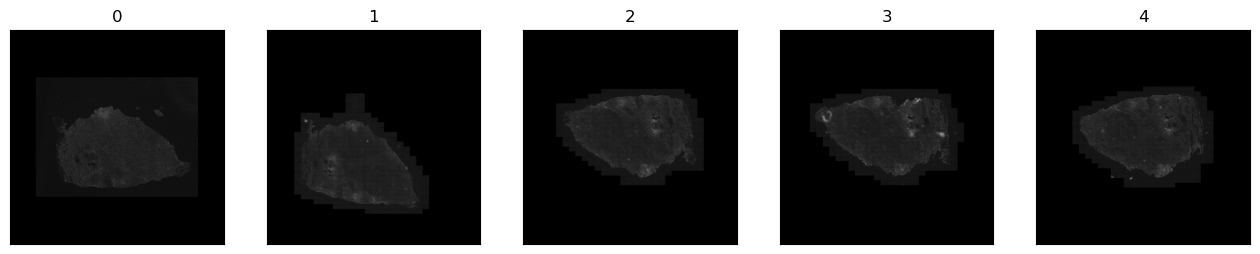

In [12]:
om_data.set_tag("gray")
om.pp.pad(om_data)
om.pl.plot_nchw_2d(om_data, aligned_tag="PAD")

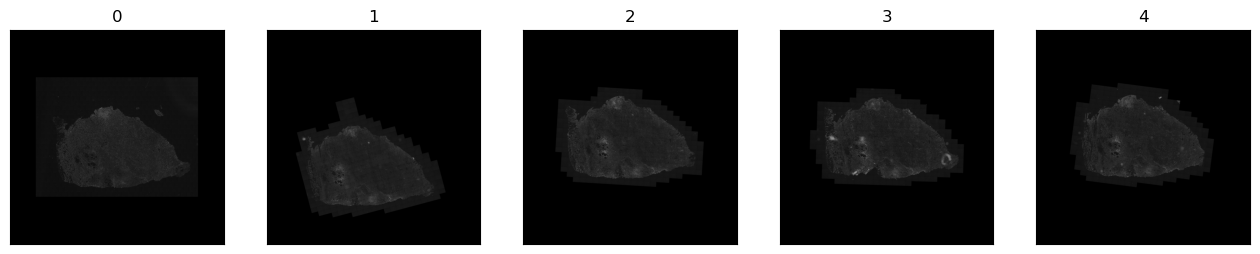

In [13]:
om.align.stack(om_data, is_stack_via_keypoints=True)
om.pl.plot_nchw_2d(om_data, aligned_tag="STACK")

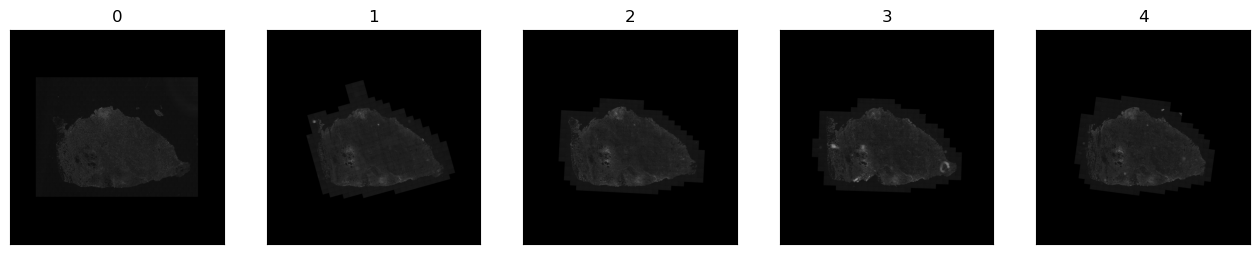

In [ ]:
om.align.affine(om_data)
om.pl.plot_nchw_2d(om_data, aligned_tag="AFFINE")

for HD refinement see [./refine_reg.ipynb](./refine_reg.ipynb)